In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./digit-recognizer/train.csv")
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


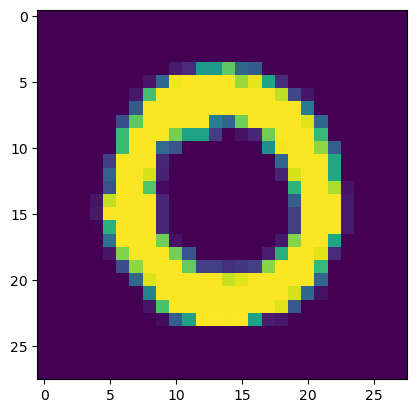

In [3]:
a = df.iloc[1,1:].to_numpy()
a = a.reshape(28,28)
plt.imshow(a)

In [4]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
train_x, test_x ,train_y, test_y = train_test_split(X,Y,test_size= 0.25,random_state= 2)
train_x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x, train_y)

RandomForestClassifier()

In [6]:
predictions = rf.predict(test_x)
count = 0
test_yval = test_y.values
for i in range(len(predictions)):
    if predictions[i] == test_yval[i]:
        count += 1
RfAccuracy = count / len(predictions)
RfAccuracy2 = accuracy_score(test_yval, predictions)
RfAccuracy, RfAccuracy2

(0.9623809523809523, 0.9623809523809523)

In [7]:
def getAccuracy (leaf_node, train_x, test_x, train_y, test_y):
    rf = RandomForestClassifier(max_leaf_nodes= leaf_node)
    rf.fit(train_x,train_y)
    prediction = rf.predict(test_x)
    RfAccuracy = accuracy_score(test_y, prediction)
    return RfAccuracy


In [10]:
leaf_nodes = np.array([5,15,35,50,100,150,200,300,500])
max = 0
optimal = 0
for i in leaf_nodes:
    test = getAccuracy(i,train_x,test_x,train_y,test_y)
    if (test > max): 
        optimal = i
        max = test
max,optimal